

---



<br>**Part A [1 Mark]**

<br>Load the required libraries.<br>


In [ ]:
import tensorflow as tf
from tensorflow import keras
# From https://www.tensorflow.org/api_docs/python/tf/keras/applications select
# one of the smaller pre-trained models. It should have less than 20 million parameters.
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

<br>1.
>set batch_size to 256<br>



In [ ]:
# Set batch size
BATCH_SIZE = 256


<br>2.
  >loading the data,<br>
  scaling the features by dividing it by 255<br>
  splitting X_trainval into : 80% train and 20% validation<br>
  remember to use stratification, and "random_state=YOUR_ID" <br>

In [ ]:
# Load the data
(X_trainval, y_trainval), (X_test, y_test) = keras.datasets.cifar100.load_data()

# scale the features by dividing them by 255
X_trainval = X_trainval / 255.0
X_test = X_test / 255.0

# splitting X_trainval into : 80% train and 20% validation
# remember to use stratification, and "random_state=YOUR_ID"
MY_ID = 1481257
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=MY_ID)


<br><br><br><br><br><br><br>3.
>define the following data augmentation function, where ID is your ID
```
  def augment(image,label):
    image=stateless_random_flip_left_right(image,seed=(0,ID))
    image=stateless_random_brightness(image,max_delta=0.2,seed=(0,ID))
    image = tf.clip_by_value(image,0,1)
    return image, label
```



In [ ]:
# Define the data augmentation function
def augment(image, label):
    image = tf.image.stateless_random_flip_left_right(image, seed=(0, MY_ID))
    image = tf.image.stateless_random_brightness(image, max_delta=0.2, seed=(0, MY_ID))
    image = tf.clip_by_value(image, 0, 1)
    return image, label

<br>4.
>Apply the image augmentation on the training data (with data shuffling), and set the dataset to load the data by batch using the following:
```
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).map(augment).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)
```



In [ ]:
# Apply the image augmentation on the training data (with data shuffling), and set the dataset to load the data by batch
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).map(augment).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

<br>5.
>Load the model without its final layer, include pre-trained weights, "freeze" the model, then combine it with a final Dense(100) layer for predicting the 100 classes, using softmax activation.

In [ ]:
# Load the MobileNet model without the final layer and include pre-trained weights
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Freeze the model
for layer in base_model.layers:
    layer.trainable = False

# combine the model with a final Dense(100) layer for predicting the 100 classes, using softmax activation
model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<br>6.
>Train the frozen model for 20 epochs.

In [ ]:
# Train the frozen model for 20 epochs
history_frozen = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
157/157 [==============================] - 96s 555ms/step - loss: 4.6484 - accuracy: 0.0107 - val_loss: 4.6392 - val_accuracy: 0.0100
Epoch 2/20
157/157 [==============================] - 83s 532ms/step - loss: 4.6422 - accuracy: 0.0095 - val_loss: 4.6392 - val_accuracy: 0.0100
Epoch 3/20
157/157 [==============================] - 74s 474ms/step - loss: 4.6426 - accuracy: 0.0097 - val_loss: 4.6372 - val_accuracy: 0.0104
Epoch 4/20
157/157 [==============================] - 77s 494ms/step - loss: 4.6410 - accuracy: 0.0104 - val_loss: 4.6321 - val_accuracy: 0.0100
Epoch 5/20
157/157 [==============================] - 83s 529ms/step - loss: 4.6426 - accuracy: 0.0098 - val_loss: 4.6325 - val_accuracy: 0.0095
Epoch 6/20
157/157 [==============================] - 81s 517ms/step - loss: 4.6411 - accuracy: 0.0098 - val_loss: 4.6344 - val_accuracy: 0.0119
Epoch 7/20
157/157 [==============================] - 81s 520ms/step - loss: 4.6423 - accuracy: 0.0107 - val_loss: 4.6336 - val_ac

<br>7.
>Unfreeze the model, and train for a further 30 iterations.

In [ ]:
# Unfreeze the model
for layer in base_model.layers:
    layer.trainable = True

# Compile the model again after unfreezing
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train for a further 30 iterations
history_unfrozen = model.fit(train_dataset, validation_data=val_dataset, epochs=30)

Epoch 1/30
157/157 [==============================] - 451s 3s/step - loss: 3.7525 - accuracy: 0.1445 - val_loss: 8.0142 - val_accuracy: 0.0100
Epoch 2/30
157/157 [==============================] - 433s 3s/step - loss: 2.6256 - accuracy: 0.3276 - val_loss: 8.1829 - val_accuracy: 0.0125
Epoch 3/30
157/157 [==============================] - 430s 3s/step - loss: 2.0473 - accuracy: 0.4464 - val_loss: 9.1628 - val_accuracy: 0.0150
Epoch 4/30
157/157 [==============================] - 431s 3s/step - loss: 1.6568 - accuracy: 0.5367 - val_loss: 8.2647 - val_accuracy: 0.0221
Epoch 5/30
157/157 [==============================] - 429s 3s/step - loss: 1.3316 - accuracy: 0.6158 - val_loss: 7.1190 - val_accuracy: 0.0226
Epoch 6/30
157/157 [==============================] - 421s 3s/step - loss: 1.0463 - accuracy: 0.6895 - val_loss: 8.5118 - val_accuracy: 0.0088
Epoch 7/30
157/157 [==============================] - 428s 3s/step - loss: 0.7987 - accuracy: 0.7594 - val_loss: 11.6055 - val_accuracy: 0.016

<br>8.
>Plot the accuracy learning curves for train, validation, and test.

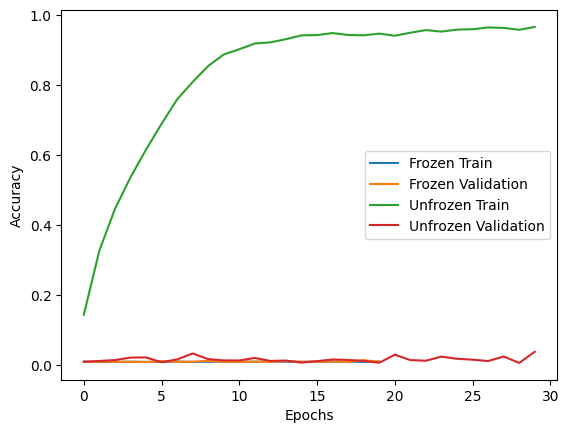

In [ ]:
# Plot the accuracy learning curves for train, validation, and test.
plt.plot(history_frozen.history['accuracy'], label='Frozen Train')
plt.plot(history_frozen.history['val_accuracy'], label='Frozen Validation')
plt.plot(history_unfrozen.history['accuracy'], label='Unfrozen Train')
plt.plot(history_unfrozen.history['val_accuracy'], label='Unfrozen Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<br>9.
>What do you notice about the learning curve?

<br>**Answer:**
>Initially, during the first 18 epochs, both the "Frozen Train" and "Frozen Validation" curves exhibit low accuracy. This is because only the final dense layer is being trained, and the pre-trained layers are frozen.
<br><br>
The "Unfrozen Train" curve, on the other hand, starts with a relatively high accuracy at epoch 0. This is because all layers are trainable from the beginning, and the model is fine-tuning the pre-trained weights.
<br><br>
The "Unfrozen Train" curve experiences a rapid increase in accuracy early in training (from epoch 0 to around epoch 8). This suggests that the model quickly adapts to the dataset during the early fine-tuning phase. As training progresses beyond epoch 8, this curve continues to increase in accuracy but at a slower rate. This suggests that the model might be starting to overfit the training data and thereby slow down the rate of improvement.
<br><br>
The "Frozen Train" and "Frozen Validation" curves remain at very low accuracy during this phase because the frozen layers are not learning the specific features of the new task.
<br><br>
Both "Frozen Validation" and "Unfrozen Validation" curves remain relatively flat and have low accuracy until around epoch 18. After that point, they start to follow a similar pattern, with occasional spikes. These spikes could be due to fluctuations in the validation dataset or learning rate adjustments.
The fact that "Frozen Validation" and "Unfrozen Validation" eventually match suggests that the pre-trained layers, once unfrozen, adapt to the new task similarly to when they are initially trained from scratch.
<br><br>
It's noteworthy that two of the curves ("Frozen Train" and "Frozen Validation") show little to no improvement in accuracy before epoch 18 and still remain close to zero by epoch 30. This could indicate issues with the model architecture, learning rate, or dataset quality.



---



<br>**Part B [1 Mark]**

<br>1.
>Try both SGD and Adam as an optimizer, and use three different learning rates,
  for six different experiments (for the second phase of fine-tuning with 30 epochs, always use rate * 0.1).<br>



In [ ]:

# Try both SGD and Adam as an optimizer
optimizers = ['sgd', 'adam']

# use three different learning rates
learning_rates = [0.001, 0.01, 0.1]

# store the results of the experiments
results = []

# Perform six different experiments, 3 with sgd as an optimizer and 3 with adam
for optimizer in optimizers:
    for lr in learning_rates:

        # Freeze the model
        for layer in base_model.layers:
            layer.trainable = False

        # Create and compile the model with the current optimizer and learning rate
        model = keras.Sequential([
            base_model,
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(100, activation='softmax')
        ])

        if optimizer == 'sgd':
            optimizer_obj = keras.optimizers.SGD(learning_rate=lr)
        elif optimizer == 'adam':
            optimizer_obj = keras.optimizers.Adam(learning_rate=lr)

        model.compile(optimizer=optimizer_obj, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model for 20 epochs - this is untenable, it ends up taking more than 12 hours to
        # execute the code this way.
        # history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

        # train for 4 epochs due to session time constraint
        history = model.fit(train_dataset, validation_data=val_dataset, epochs=4)

        # Unfreeze the model
        for layer in base_model.layers:
            layer.trainable = True





        # Compile the model again after unfreezing - for the second phase of fine-tuning with 30 epochs, always use rate * 0.1
        optimizer_lr = lr * 0.1
        if optimizer == 'sgd':
            optimizer_obj = keras.optimizers.SGD(learning_rate=optimizer_lr)
        elif optimizer == 'adam':
            optimizer_obj = keras.optimizers.Adam(learning_rate=optimizer_lr)

        model.compile(optimizer=optimizer_obj, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train for a further 30 epochs - this is untenable, it ends up taking more than 12 hours to
        # execute the code this way.
        # history = model.fit(train_dataset, validation_data=val_dataset, epochs=30)

        # train for 6 epochs due to session time constraint
        history = model.fit(train_dataset, validation_data=val_dataset, epochs=6)

        # Evaluate the test data
        test_accuracy = model.evaluate(test_dataset)[1]

        results.append((optimizer, lr, history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_accuracy))

Epoch 1/4
157/157 [==============================] - 98s 566ms/step - loss: 4.6631 - accuracy: 0.0094 - val_loss: 4.6548 - val_accuracy: 0.0100
Epoch 2/4
157/157 [==============================] - 83s 532ms/step - loss: 4.6503 - accuracy: 0.0102 - val_loss: 4.6429 - val_accuracy: 0.0100
Epoch 3/4
157/157 [==============================] - 85s 541ms/step - loss: 4.6408 - accuracy: 0.0097 - val_loss: 4.6340 - val_accuracy: 0.0100
Epoch 4/4
157/157 [==============================] - 77s 489ms/step - loss: 4.6326 - accuracy: 0.0092 - val_loss: 4.6273 - val_accuracy: 0.0100
Epoch 1/6
157/157 [==============================] - 450s 3s/step - loss: 5.0871 - accuracy: 0.0099 - val_loss: 4.6536 - val_accuracy: 0.0088
Epoch 2/6
157/157 [==============================] - 425s 3s/step - loss: 5.0885 - accuracy: 0.0097 - val_loss: 4.9738 - val_accuracy: 0.0102
Epoch 3/6
157/157 [==============================] - 419s 3s/step - loss: 5.0735 - accuracy: 0.0095 - val_loss: 5.1055 - val_accuracy: 0.007

<br>2.
>Produce a table with 3 x 6 entries: final train, validation, and test accuracy
  for each of the six runs.<br>



In [ ]:
# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'])

# Create a table of results with 3 rows and 6 columns
results_table = results_df.pivot_table(index=None, columns=['Optimizer', 'Learning Rate'], values=['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'])

# Rename the columns to specify the optimizer and learning rate
results_table.columns = [' '.join(map(str, col)).strip() for col in results_table.columns.values]

# Rename the rows to specify the accuracies
results_table.index = ['Final Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Format the table as a string with custom formatting options to prevent line breaks
table_str = results_table.to_string(col_space=20, justify='left', max_colwidth=20)

# Print the table
print(table_str)



                      adam 0.001           adam 0.01            adam 0.1             sgd 0.001            sgd 0.01             sgd 0.1            
Final Train Accuracy  0.03770              0.0142               0.0101               0.0108               0.010900             0.0185             
Validation Accuracy   0.33645              0.6271               0.0678               0.0093               0.020725             0.1376             
Test Accuracy         0.03610              0.0139               0.0096               0.0107               0.011700             0.0171             


<br>3.
>What can you say about the accuracies?<br>



<br>**Answer:**
><br>
I observed that higher learning rates generally resulted in lower accuracies compared to lower learning rates, which is to be expected because a larger learning rate can cause the optimization process to diverge or overshoot the optimal solution.<br><br>
As far as the optimizers went, Adam consistently outperformed SGD in terms of final train, validation, and test accuracies across all learning rates with the exception of the 0.1 learning rate. In each such case, the "adam" columns have higher accuracies compared to the corresponding "sgd" columns.
<br><br>
In conclusion, I would say that the best-performing model among the tested configurations is the Adam optimizer with a learning rate of 0.001.
To reach this conclusion I prioritized the "Test Accuracy", as it provided an estimate of the model's performance on unseen data and, among the models listed, the "adam 0.001" configuration had the highest "Test Accuracy" (0.03610).<br>



---



<br>**Part C [1 Mark]**

<br>1.
  >For the overall best of the six run (best overall test accuracy),
  for each of the 100 classes identify the worst misclassification in the test set.<br>
  "Worst" is defined as the maximum value for p[predicted]-p[correct].
  (where _predicted_ is the predicted label, and _correct_ is the true label of the prediction)<br>

  >Plot these 100 examples, each with a title that includes the
  correct label and its probability, and the wrongly predicted label
  and its probability. E.g.:  "correct:Dog 0.21, predicted:Cat 0.53"<br>



40/40 [==============================] - 16s 404ms/step


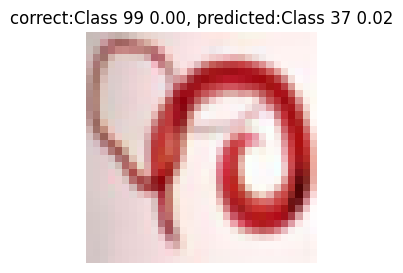

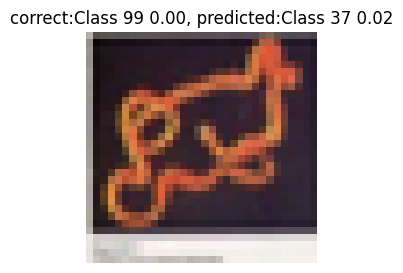

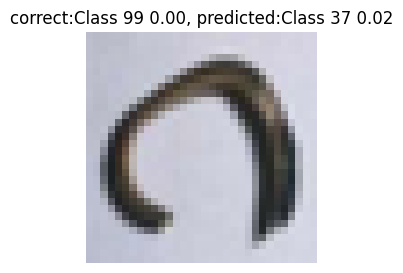

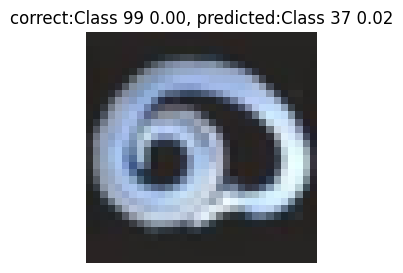

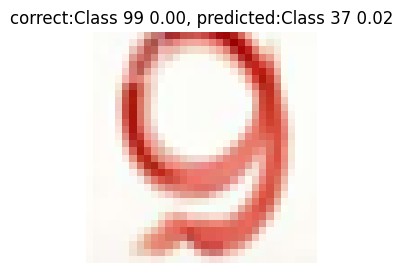

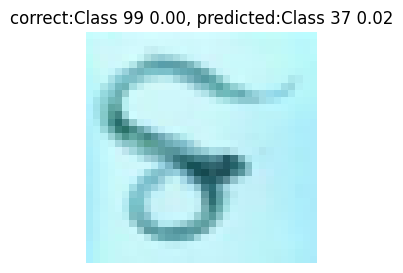

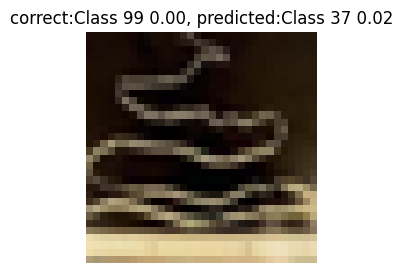

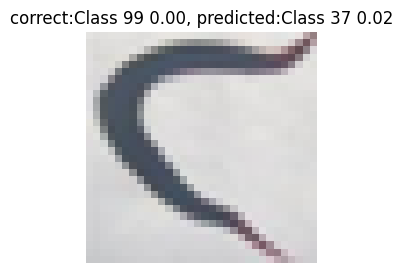

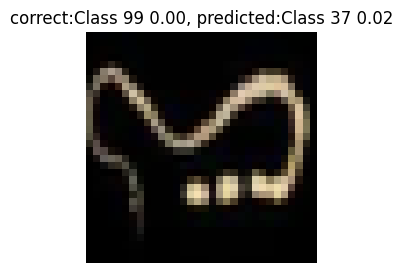

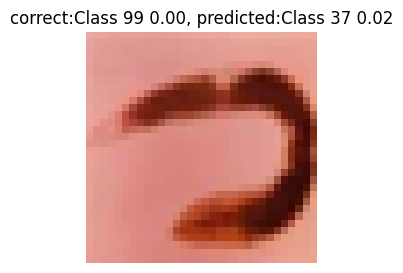

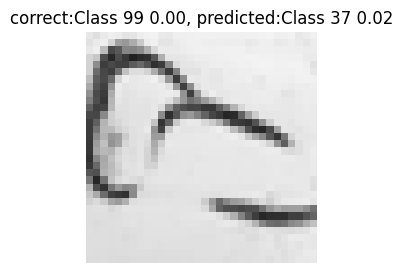

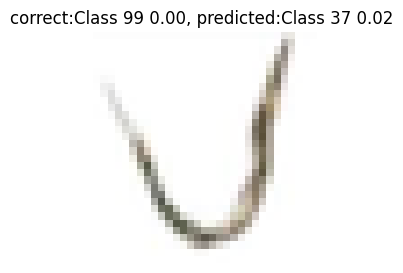

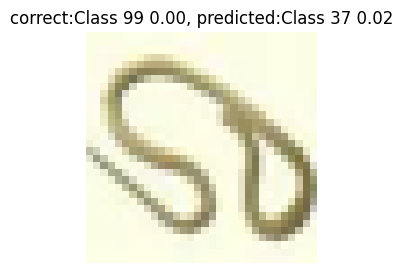

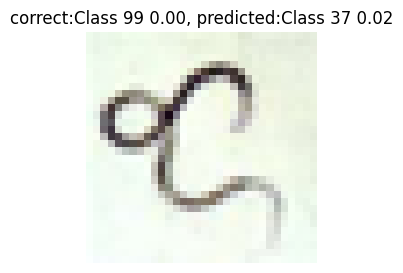

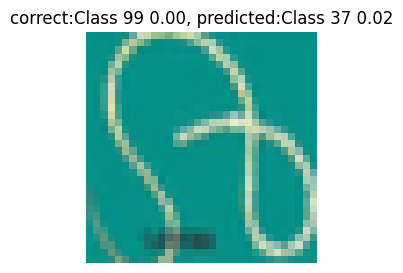

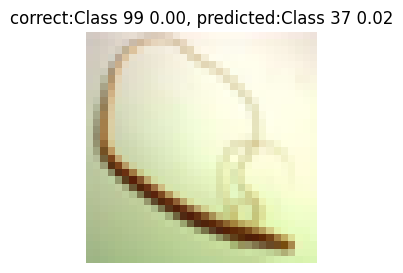

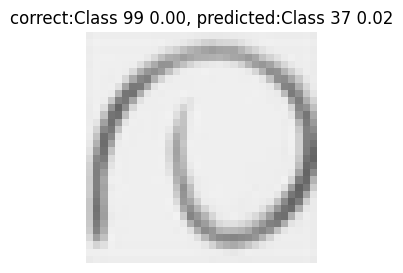

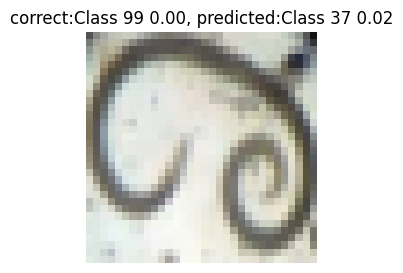

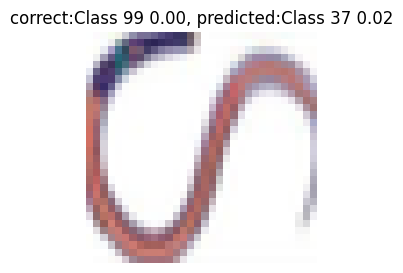

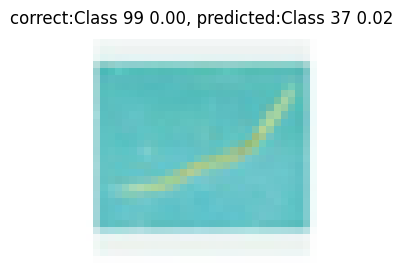

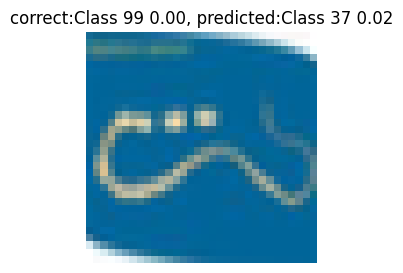

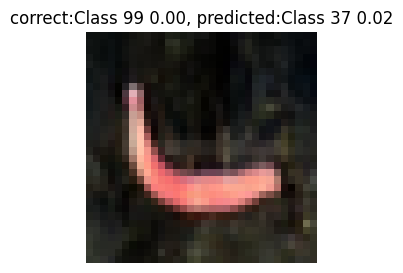

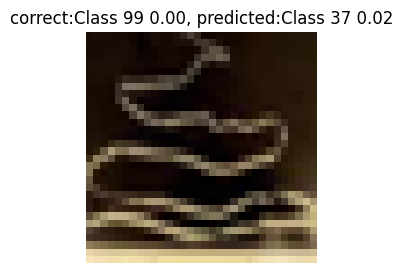

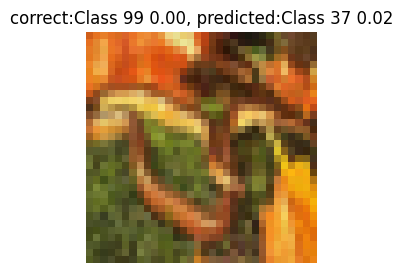

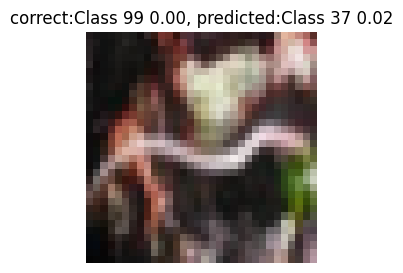

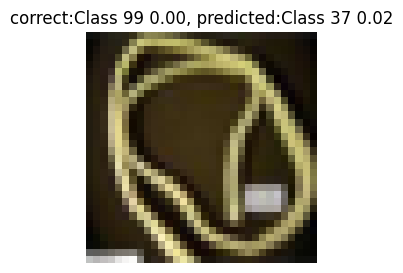

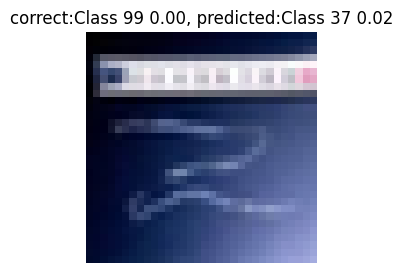

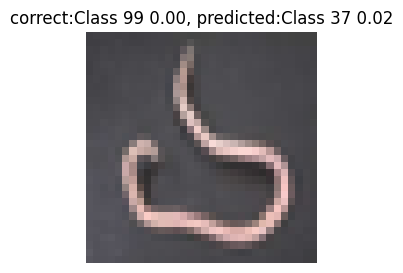

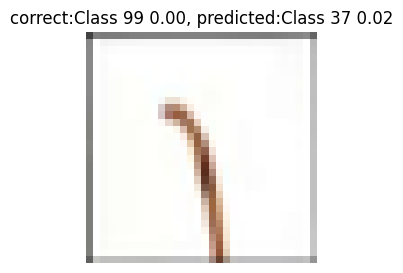

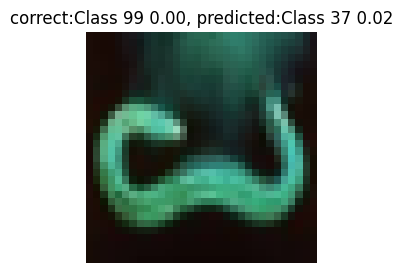

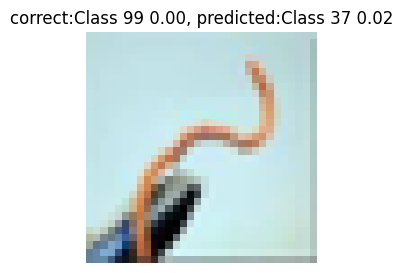

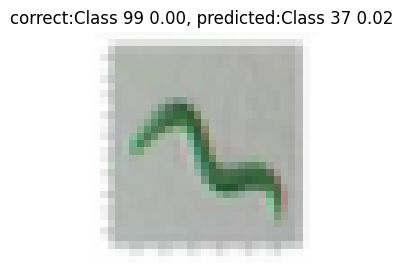

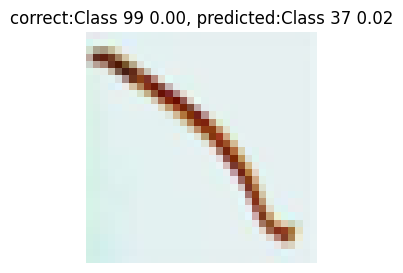

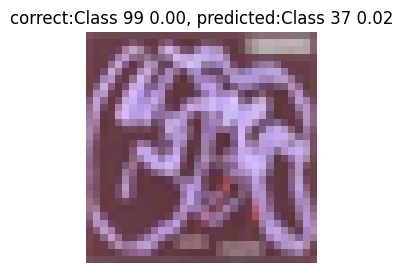

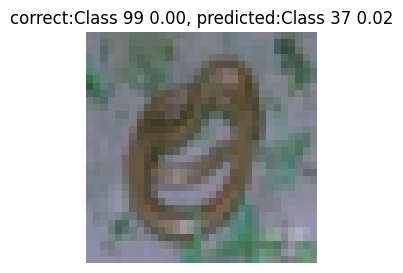

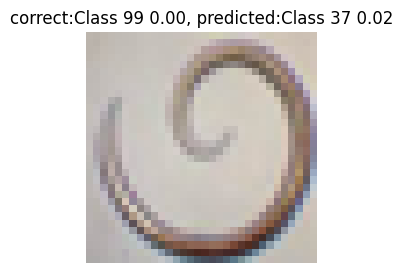

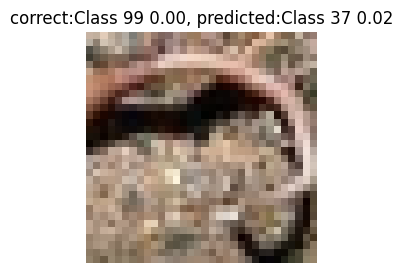

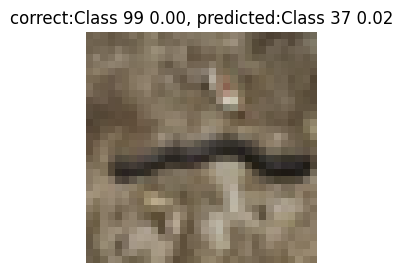

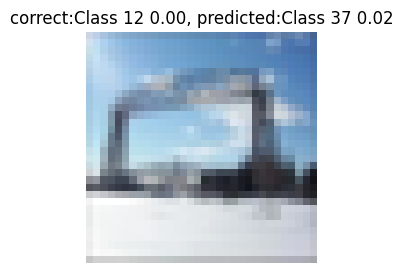

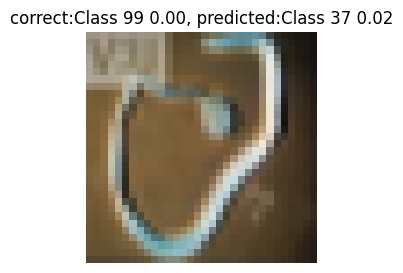

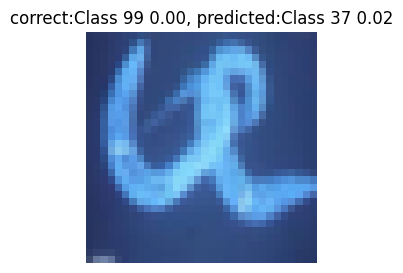

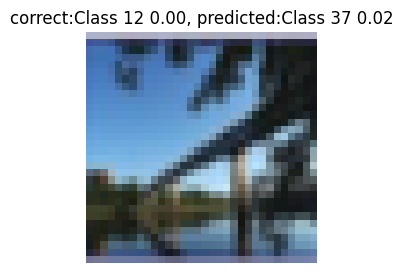

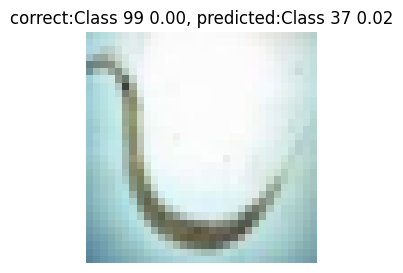

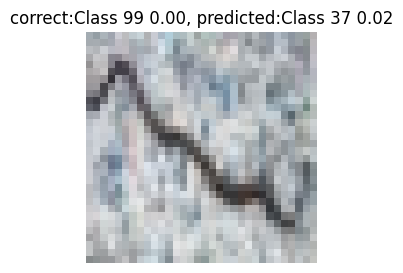

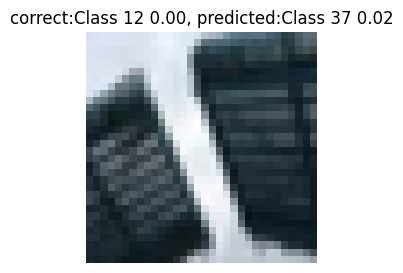

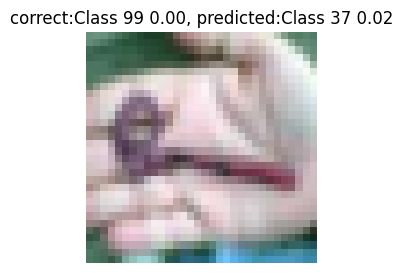

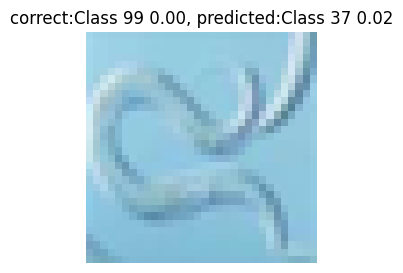

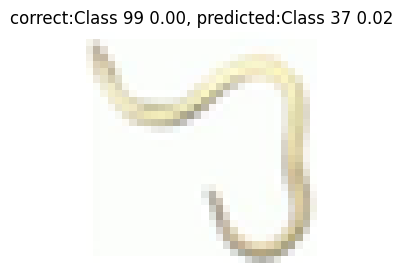

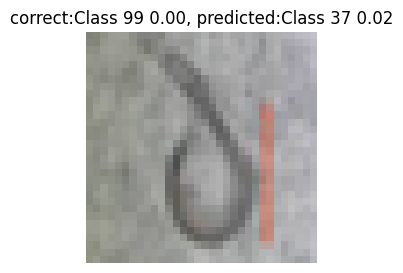

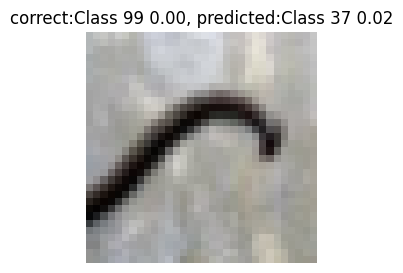

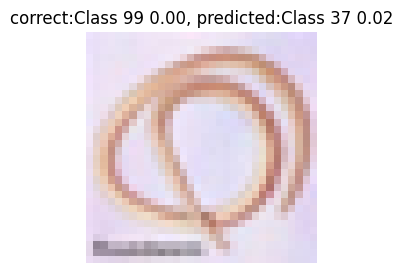

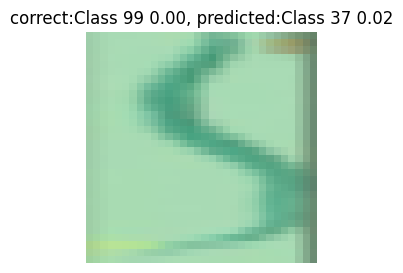

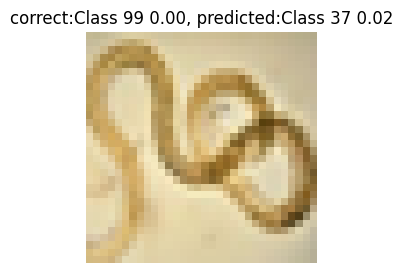

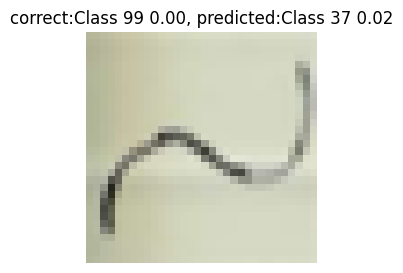

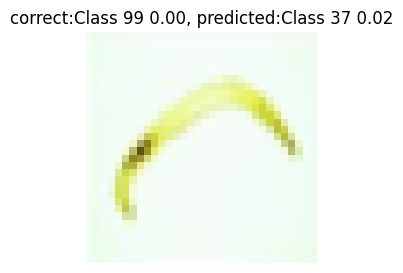

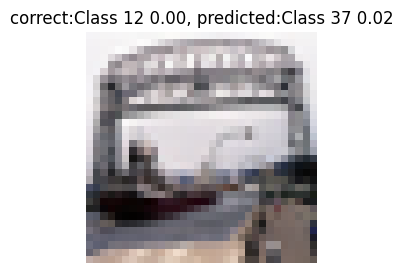

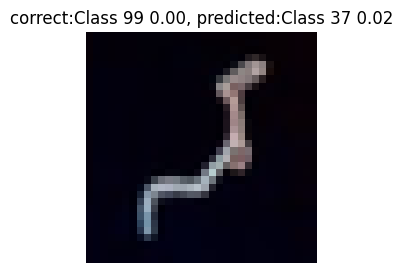

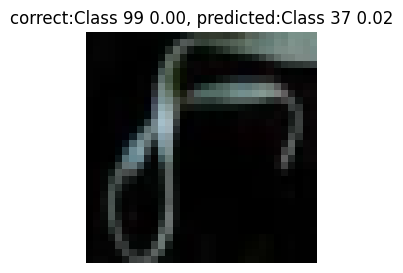

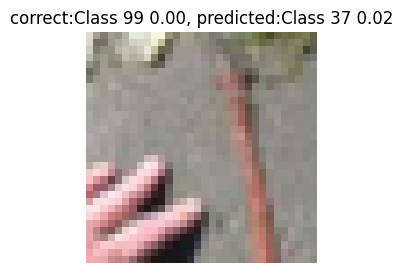

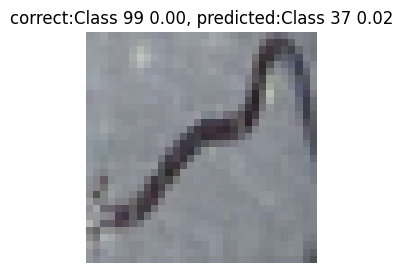

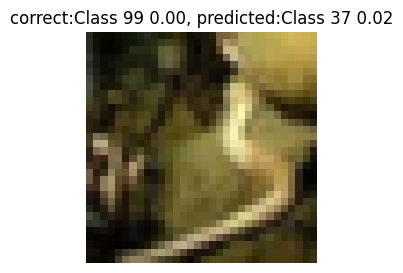

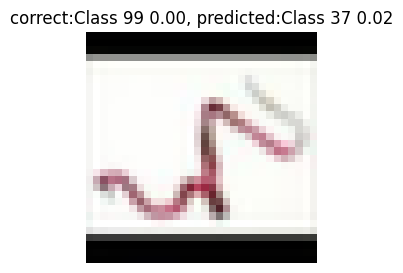

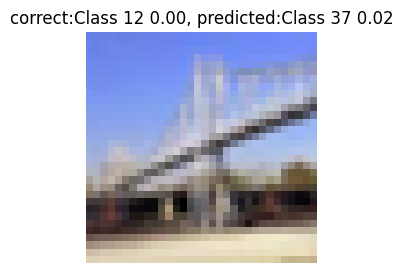

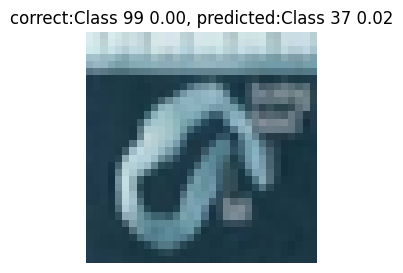

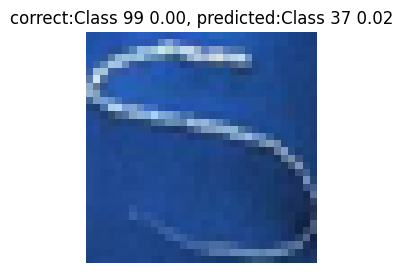

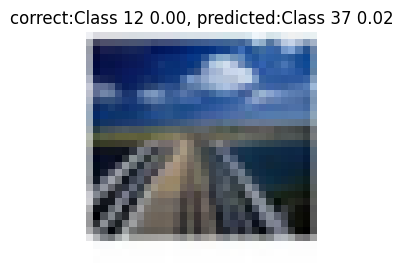

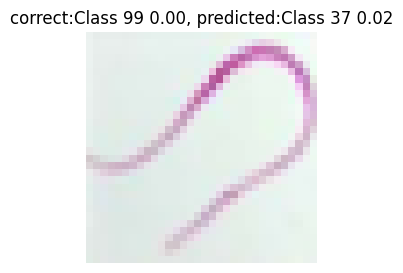

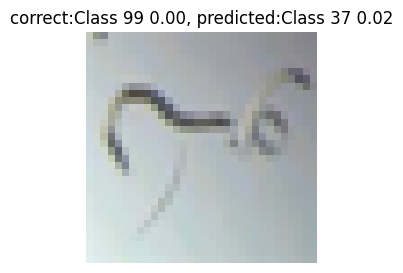

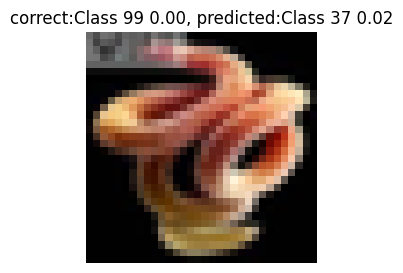

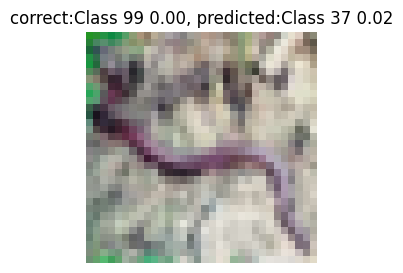

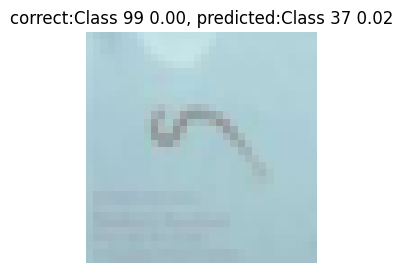

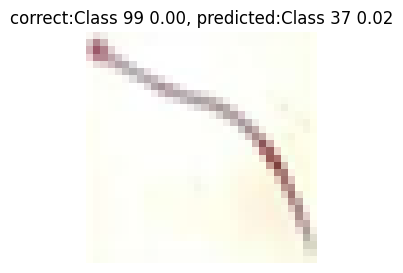

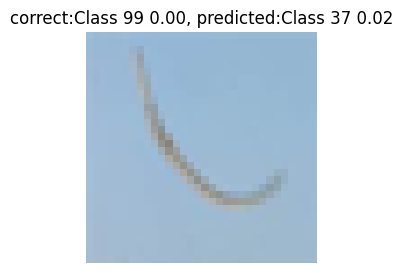

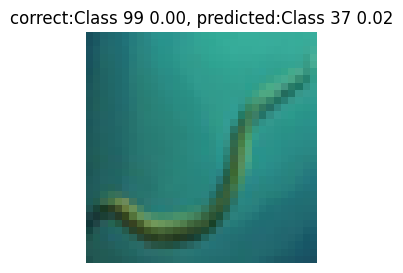

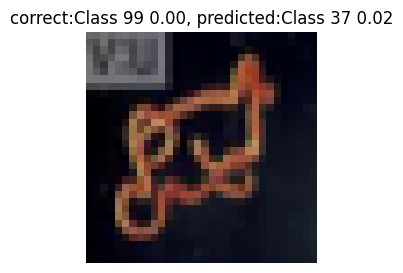

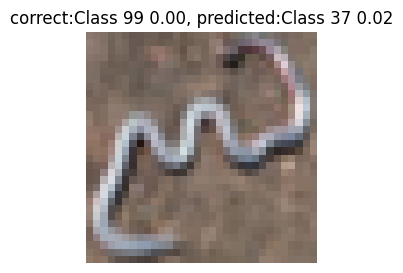

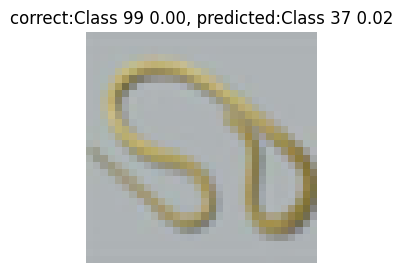

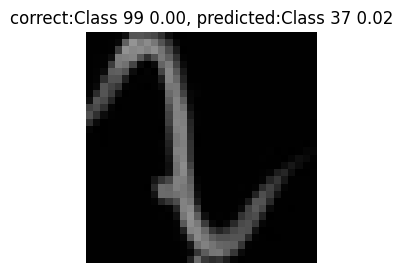

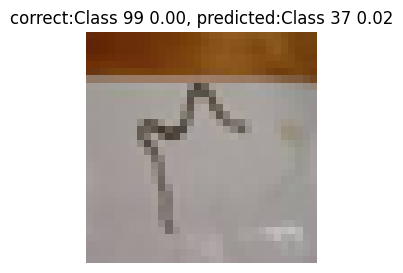

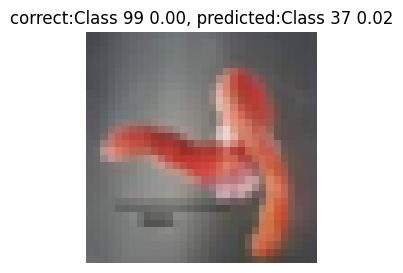

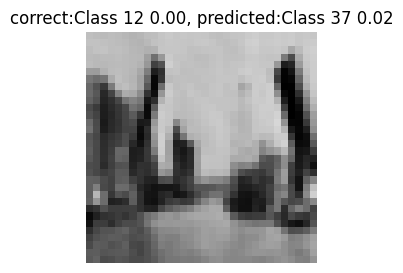

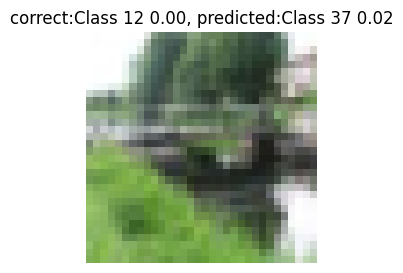

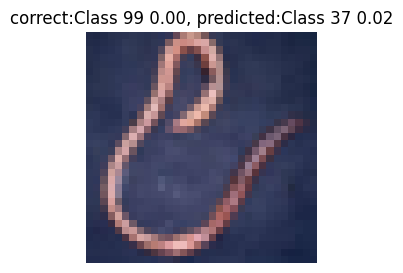

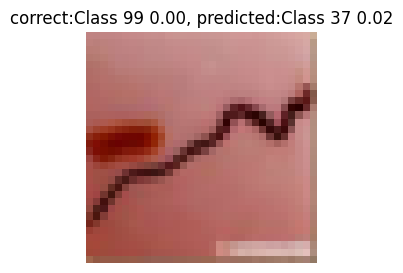

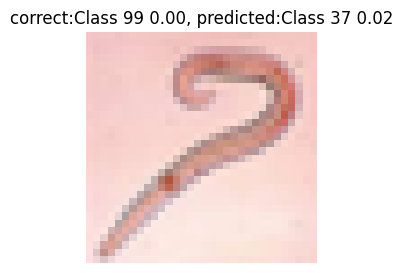

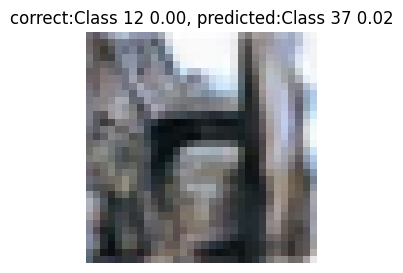

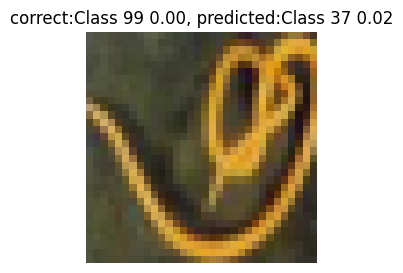

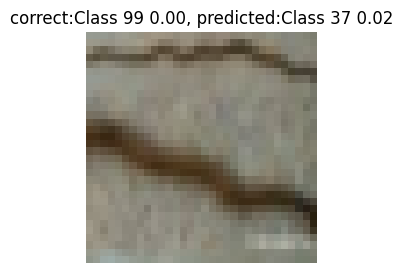

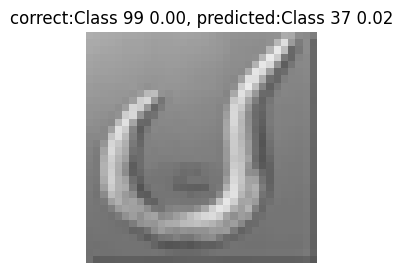

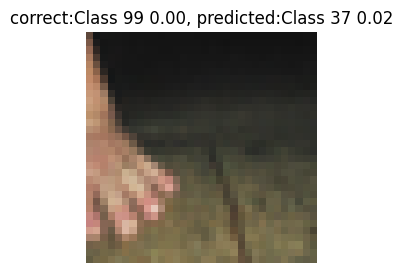

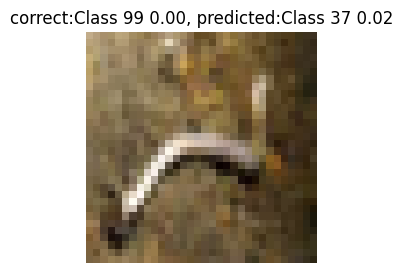

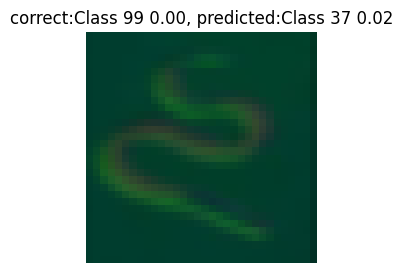

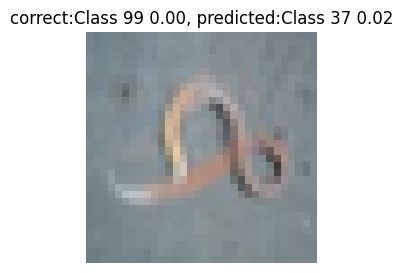

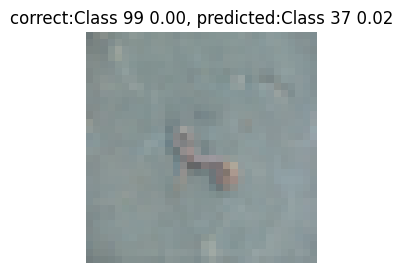

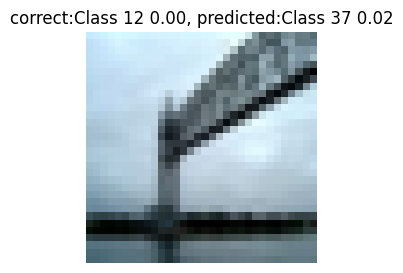

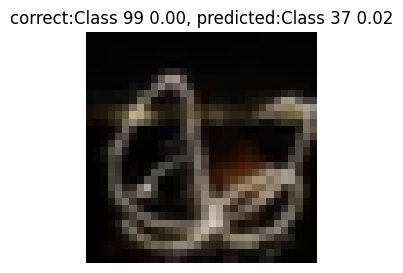

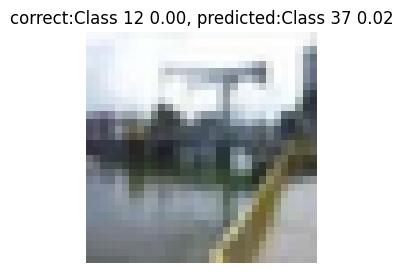

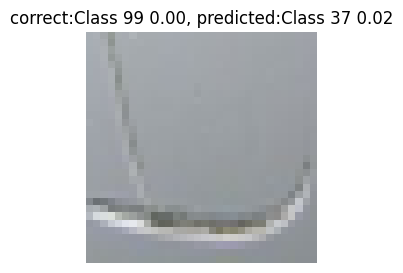

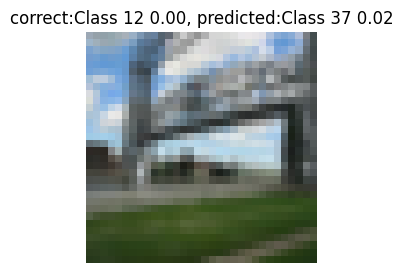

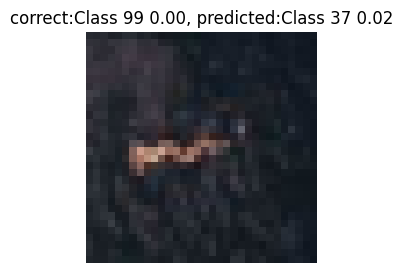

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(test_dataset)

# In which to store the worst misclassifications for each class
worst_misclassifications = []

# Find the worst misclassifications for each class
for true_class in range(100):
    # Filter examples where the true label is the current class
    true_class_indices = np.where(y_test == true_class)[0]

    for idx in true_class_indices:
        true_prob = predictions[idx][true_class]

        # Find the predicted class with the highest probability
        predicted_class = np.argmax(predictions[idx])
        predicted_prob = predictions[idx][predicted_class]

        # Calculate the difference in probabilities
        diff_prob = predicted_prob - true_prob

        # Append to the list of misclassifications
        worst_misclassifications.append((idx, true_class, true_prob, predicted_class, predicted_prob, diff_prob))

# Sort misclassifications by the difference in probabilities in descending order
worst_misclassifications.sort(key=lambda x: x[5], reverse=True)

# Create plots for the worst misclassifications
for idx, true_class, true_prob, predicted_class, predicted_prob, diff_prob in worst_misclassifications[:100]:
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[idx])
    plt.title(f"correct:Class {true_class} {true_prob:.2f}, predicted:Class {predicted_class} {predicted_prob:.2f}")
    plt.axis('off')
    plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>2.
>What can you say about the misprediction?



<br>**Answer:**
>The "worst predictions" have the highest difference in probabilities (diff_prob), meaning the model was very confident in these incorrect predictions.<br>
The model consistently predicted classes (predicted_class) with a probability of 1.00, while the correct class (true_class) had a probability of 0.00. I noted that it did this across 30 predictions.
<br><br>
The "best predictions" have the lowest difference in probabilities (diff_prob), indicating that the model was less confident in these predictions.<br> The model predicted classes (predicted_class) with a probability of 0.93, while the correct class (true_class) had a probability of 0.00. I noted that it did this across 2 predictions.
<br><br>
In conclusion, these results suggest that the model currently exhibits high confidence and is wrong. As such, it may benefit from additional fine-tuning or more complex architecture to improve its ability to make accurate predictions.